# 1. Overview of Dataset 📋

In [ ]:
#Import all the necessary libraries for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the `spotify-2023.csv` file
#Use `latin1` to ensure that special characters are registered
df = pd.read_csv('spotify-2023.csv', encoding = 'latin1')

In [3]:
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [4]:
#Getting the size of the dataset
print("Rows:", df.shape[0], "Columns:", df.shape[1])

Rows: 953 Columns: 24


In [5]:
#Checking the data types of each column
print(df.dtypes)

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


In [6]:
#Checking if there are any missing values
print(df.isnull().sum())

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


# 2. Basic Descriptive Statistics 📊

In [7]:
#Converts the 'streams' column to numeric values
#This changes any non-numeric values with Not a Number(NaN)
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

#Calculate and print the mean
print("Mean:", df['streams'].mean())
#Calculate and print the median
print("Median:", df['streams'].median())
#Calculate and print the standard deviation
print("Standard Deviation:", df['streams'].std())

Mean: 514137424.93907565
Median: 290530915.0
Standard Deviation: 566856949.0388832


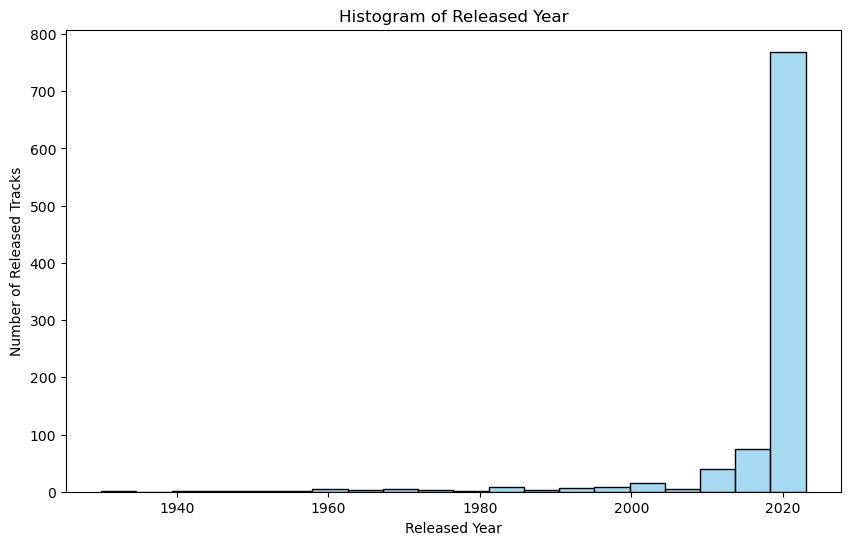

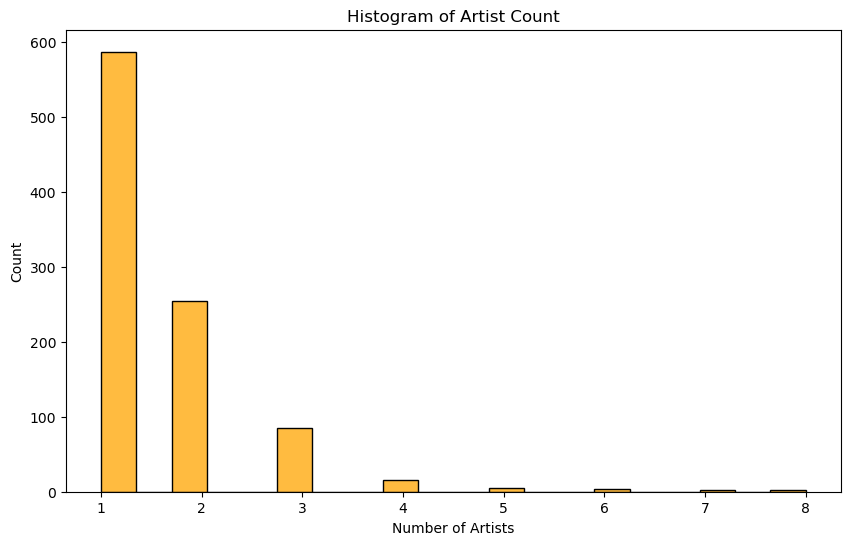

In [8]:
#Histogram for 'released_year'
plt.figure(figsize=(10, 6))
sns.histplot(df['released_year'], bins=20, color='skyblue')  
plt.title('Histogram of Released Year')
plt.xlabel('Released Year')
plt.ylabel('Number of Released Tracks')
plt.show()

#Histogram for 'artist_count'
plt.figure(figsize=(10, 6))
sns.histplot(df['artist_count'], bins=20, color='orange') 
plt.title('Histogram of Artist Count')
plt.xlabel('Number of Artists')
plt.ylabel('Count')
plt.show()

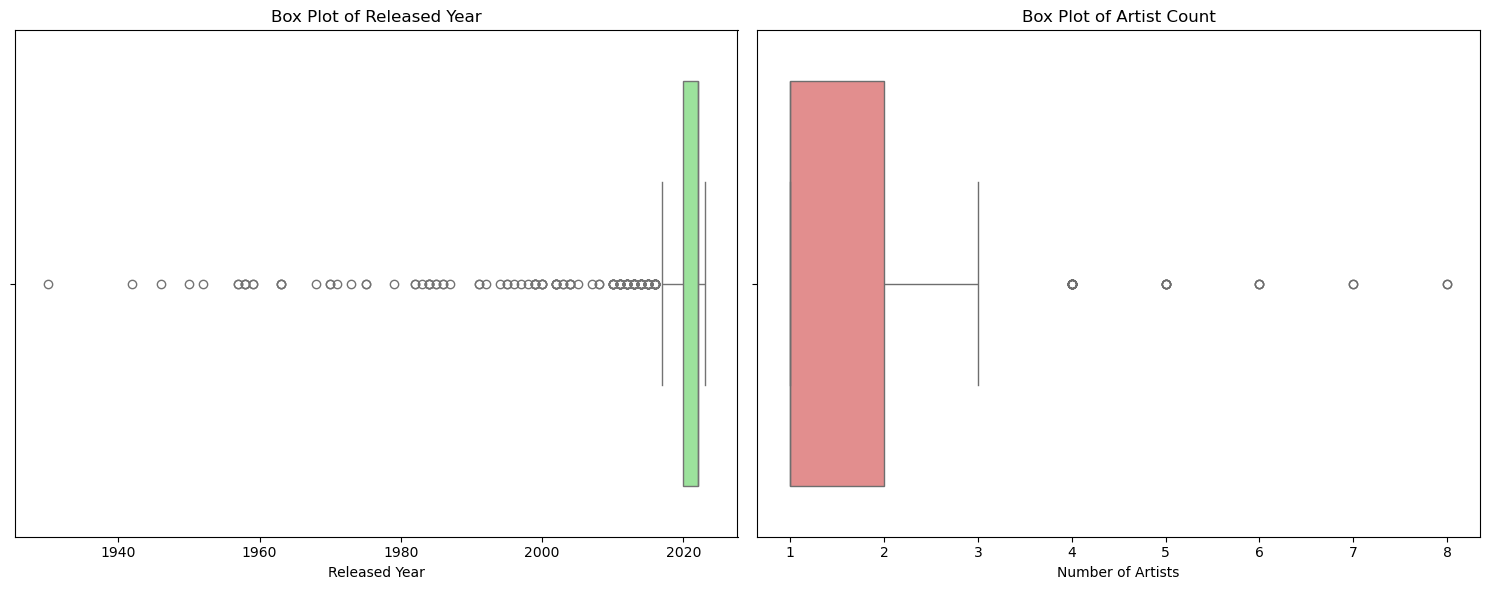

In [9]:
#Creating side-by-side plots to determine outliers
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

#Box plot for released_year on the first subplot (left side)
sns.boxplot(x=df['released_year'], color='lightgreen', ax=ax[0])
ax[0].set_title('Box Plot of Released Year')
ax[0].set_xlabel('Released Year')

#Box plot for artist_count on the second subplot (right side)
sns.boxplot(x=df['artist_count'], color='lightcoral', ax=ax[1])
ax[1].set_title('Box Plot of Artist Count')
ax[1].set_xlabel('Number of Artists')

#Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

# 3. Top Performers 🏆

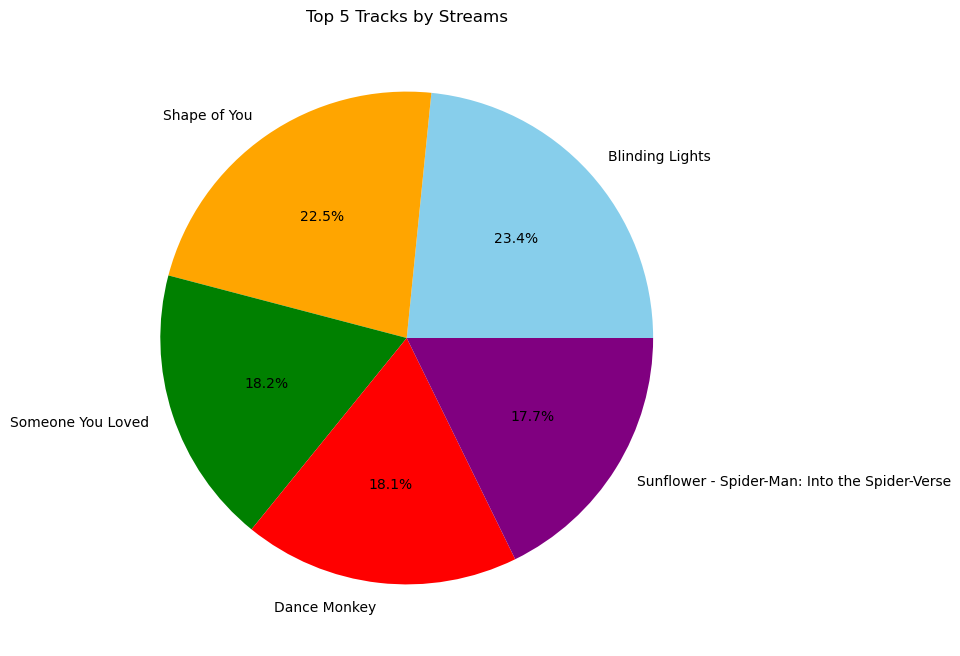

In [10]:
#Sort the DataFrame by 'streams' in descending order and select the top 5 rows
top_5_tracks = df.sort_values(by='streams', ascending=False)[['track_name', 'streams']].head(5)

#Pie chart to visualize the top 5 tracks based on number of streams
plt.figure(figsize=(8, 8))
plt.pie(top_5_tracks['streams'], labels=top_5_tracks['track_name'], autopct='%1.1f%%', colors=['skyblue', 'orange', 'green', 'red', 'purple'])
plt.title('Top 5 Tracks by Streams')
plt.show()

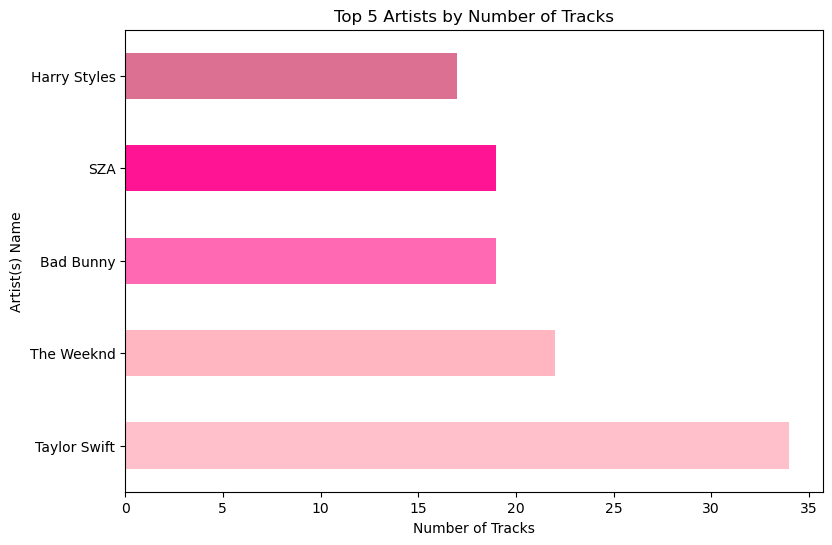

In [11]:
#Count number of tracks per artist and extract top 5
top_5 = df['artist(s)_name'].value_counts().head()

#Plot horizontal bar chart
plt.figure(figsize=(9, 6))  

#Horizontal bar plot with custom colors
top_5.plot(kind='barh', color=['#FFC0CB', '#FFB6C1', '#FF69B4', '#FF1493', '#DB7093'])  
plt.title('Top 5 Artists by Number of Tracks')  
plt.xlabel('Number of Tracks')  
plt.ylabel('Artist(s) Name') 
plt.show() 

# 4. Temporal Trends 📅

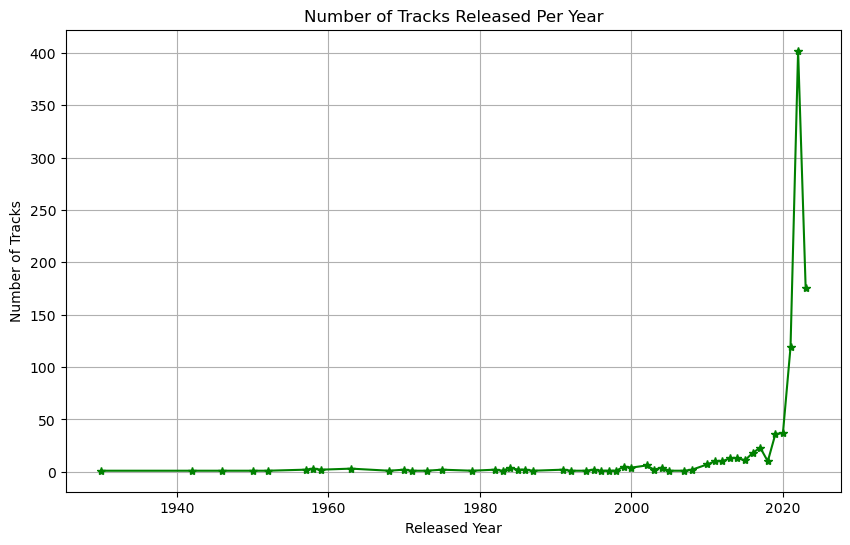

In [12]:
#Example of counting tracks per year (ensure this is already done)
number_track_peryear = df.groupby('released_year')['track_name'].count()

#Create a figure for the plot
plt.figure(figsize=(10, 6))

#Create a line plot with grid for better visualization
number_track_peryear.plot(kind='line', color='green', marker='*')  

#Title and labels
plt.title('Number of Tracks Released Per Year')
plt.xlabel('Released Year')
plt.ylabel('Number of Tracks')

#Display grid for better readability
plt.grid(True)

#Show the plot
plt.show()

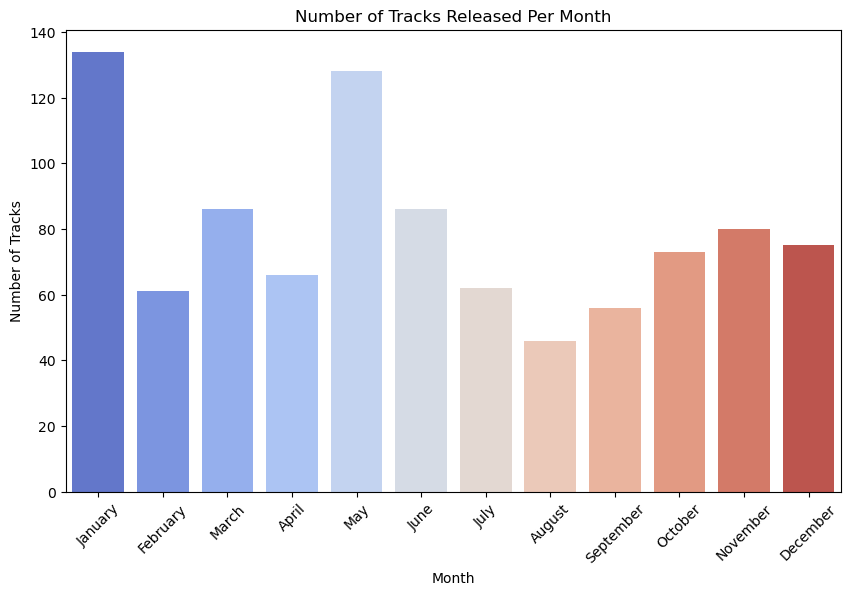

In [13]:
#Counting and sorting the number of tracks released per month from the dataset
track_month = df['released_month'].value_counts().sort_index()

#Dictionary for months
months = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 
          8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}

#Mapping the month number to the corresponding name
track_month = track_month.rename(months)

#Plotting the number of tracks released per month
plt.figure(figsize=(10, 6))

#Plot with 'hue' parameter and a custom color palette
sns.barplot(x=track_month.index, y=track_month.values, hue=track_month.index, palette='coolwarm', legend=False)
plt.title("Number of Tracks Released Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Tracks")
plt.xticks(rotation=45)
plt.show()

# 5. Genre and Music Characteristics 🎶

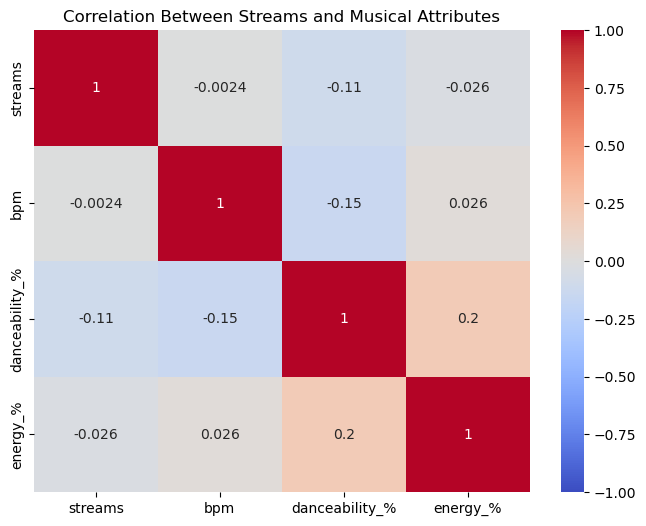

In [14]:
#Extracting specific columns
attributes = df[['streams', 'bpm', 'danceability_%', 'energy_%']]

#Correlation matrix
correlation_matrix = attributes.corr()

#Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Streams and Musical Attributes')
plt.show()

In [15]:
#Select the relevant columns (streams, bpm, danceability_%, and energy_%)
attributes = df[['streams', 'bpm', 'danceability_%', 'energy_%']]

#Correlation matrix
correlation_matrix = attributes.corr()

#Display the correlation matrix
print(correlation_matrix)


                 streams       bpm  danceability_%  energy_%
streams         1.000000 -0.002438       -0.105457 -0.026051
bpm            -0.002438  1.000000       -0.147095  0.025794
danceability_% -0.105457 -0.147095        1.000000  0.198095
energy_%       -0.026051  0.025794        0.198095  1.000000


In [16]:
#Select relevant columns
attributes = df[['danceability_%', 'energy_%', 'valence_%', 'acousticness_%']]

#Compute the correlation matrix
correlation_matrix = attributes.corr()

#Display the correlation matrix
print(correlation_matrix)

                danceability_%  energy_%  valence_%  acousticness_%
danceability_%        1.000000  0.198095   0.408451       -0.236165
energy_%              0.198095  1.000000   0.357612       -0.577344
valence_%             0.408451  0.357612   1.000000       -0.081907
acousticness_%       -0.236165 -0.577344  -0.081907        1.000000


# 6. Platform Popularity 📱

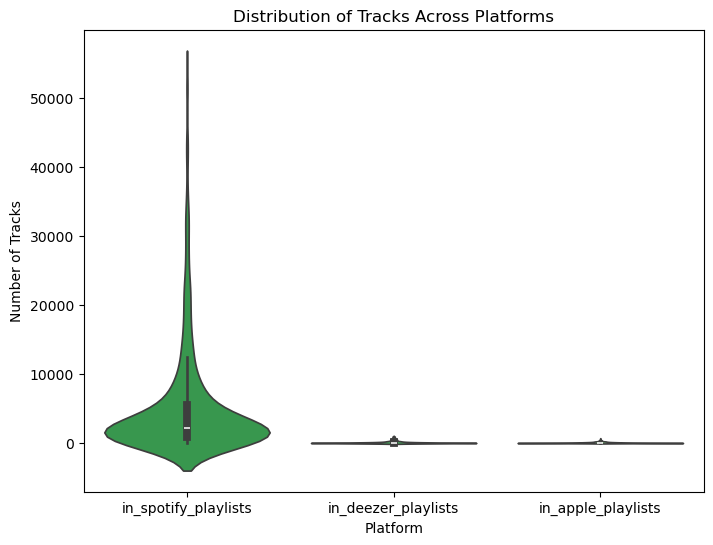

In [17]:
#Convert columns to numeric and sum the number of tracks per platform
numtrack_playlists = df[['in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists']].apply(pd.to_numeric, errors='coerce').sum()

#Prepare the data for the violin plot 
df_melted = df[['in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists']].apply(pd.to_numeric, errors='coerce')
df_melted = df_melted.melt(var_name='Platform', value_name='Number of Tracks')

#Create a violin plot to visualize the distribution of tracks by platform
plt.figure(figsize=(8, 6))
sns.violinplot(x='Platform', y='Number of Tracks', data=df_melted, hue='Platform', palette=["#28a745", "#34d058", "#7bed7f"], legend=False)
plt.title("Distribution of Tracks Across Platforms")
plt.xlabel("Platform")
plt.ylabel("Number of Tracks")
plt.show()

# 7. Advanced Analysis 🔎

Average streams by mode and key
      mode key       streams
6   Major   E  7.605963e+08
5   Major  D#  6.819623e+08
3   Major  C#  6.285883e+08
1   Major  A#  6.275336e+08
19  Minor  F#  5.954921e+08
13  Minor   B  5.825110e+08
4   Major   D  5.720180e+08
14  Minor  C#  5.665252e+08
10  Major  G#  5.458044e+08
7   Major   F  5.279311e+08
17  Minor   E  5.083264e+08
9   Major   G  4.929813e+08
12  Minor  A#  4.849231e+08
16  Minor  D#  4.793647e+08
2   Major   B  4.363336e+08
8   Major  F#  4.175450e+08
11  Minor   A  4.173906e+08
18  Minor   F  4.102836e+08
0   Major   A  4.019603e+08
20  Minor   G  3.637593e+08
15  Minor   D  3.425588e+08
21  Minor  G#  3.219036e+08


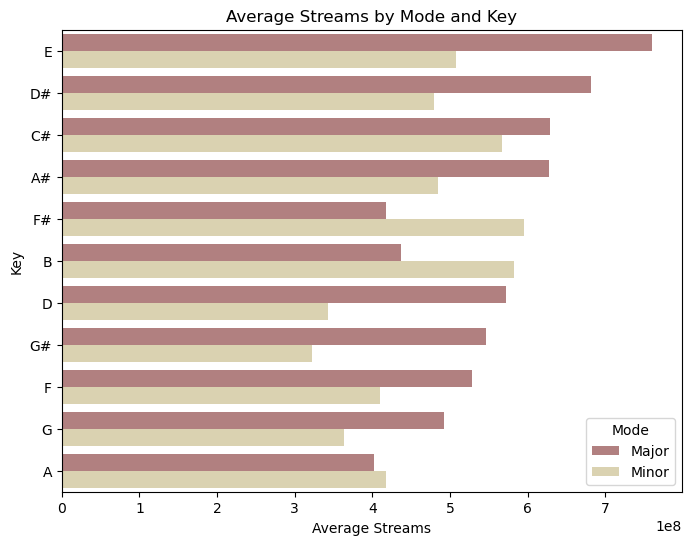

In [18]:
# Calculate average streams per mode and key
stream_data = df.groupby(['mode', 'key'])['streams'].mean().reset_index()

# Sort by streams in descending order
sorted_stream = stream_data.sort_values('streams', ascending=False)

# Print the sorted average streams
print("Average streams by mode and key\n", sorted_stream)

# Create a horizontal bar plot with pink color palette
plt.figure(figsize=(8, 6))
sns.barplot(x='streams', y='key', hue='mode', data=sorted_stream, palette='pink')
plt.xlabel("Average Streams")
plt.ylabel("Key")
plt.title("Average Streams by Mode and Key")
plt.legend(title='Mode')
plt.show()


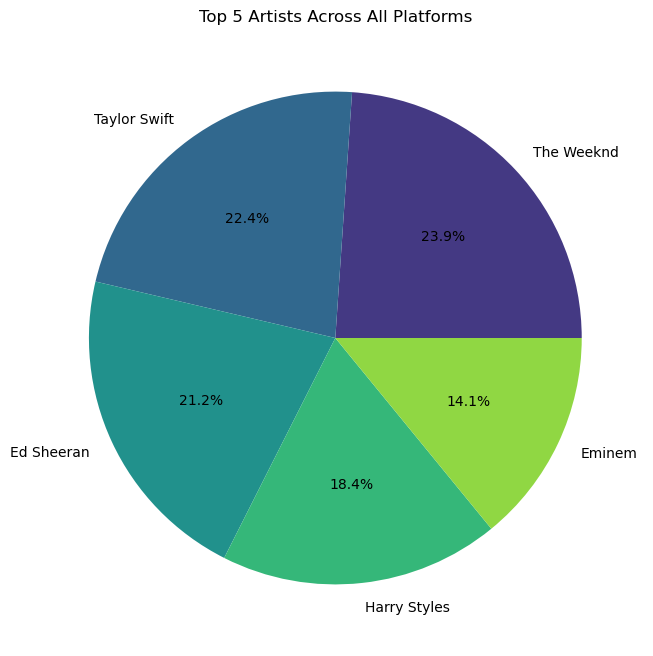

In [19]:
#Convert selected columns to numeric, coerce errors to NaN
columns_to_convert = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 
                      'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

#Group by artist and sum appearances across platforms
artist_appearances = df.groupby('artist(s)_name')[columns_to_convert].sum()
artist_appearances['Total_appearances'] = artist_appearances.sum(axis=1)

#Sort by total appearances and get the top 5 artists
top_artists = artist_appearances.sort_values('Total_appearances', ascending=False).head()

#Plot as pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_artists['Total_appearances'], labels=top_artists.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(top_artists)))
plt.title("Top 5 Artists Across All Platforms")
plt.show()